In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Question 1
### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [2]:
crime=pd.read_csv("/Users/apple/Downloads/crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## KMeans

In [4]:
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])

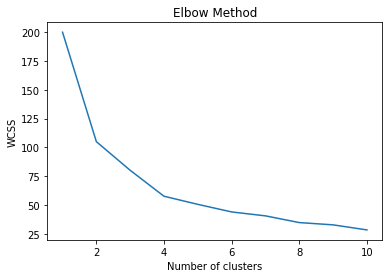

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
clusters_new = KMeans(6, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=6, random_state=42)

In [7]:
clusters_new.labels_

array([4, 0, 2, 1, 2, 2, 5, 1, 2, 4, 5, 3, 2, 1, 3, 1, 1, 4, 3, 2, 5, 2,
       3, 4, 2, 1, 1, 2, 3, 5, 2, 2, 4, 3, 5, 1, 1, 5, 5, 4, 3, 4, 2, 5,
       3, 1, 5, 3, 3, 1], dtype=int32)

In [8]:
crime['clusterid_new'] = clusters_new.labels_

In [9]:
clusters_new.cluster_centers_

array([[ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [-0.23125052, -0.30342672, -0.27242367, -0.23973789],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511]])

In [10]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,10.000000,263.000000,48.000000,44.500000
1,1,6.790909,145.727273,61.636364,19.009091
2,2,10.883333,256.916667,78.333333,32.250000
3,3,2.680000,70.100000,51.000000,10.910000
4,4,14.671429,251.285714,54.285714,21.685714
5,5,4.955556,125.444444,80.111111,17.788889


In [11]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


## Hierarchial clustring

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
df_norm = norm_func(crime.iloc[:,1:])

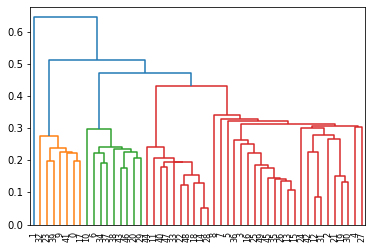

In [14]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [15]:
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'single')

In [16]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [17]:
df_norm['h_clusterid'] = hc.labels_

In [18]:
df_norm['h_clusterid'].head()

0    2
1    3
2    0
3    0
4    0
Name: h_clusterid, dtype: int64

In [19]:
pd.concat([crime,df_norm['h_clusterid']],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new,h_clusterid
0,Alabama,13.2,236,58,21.2,4,2
1,Alaska,10.0,263,48,44.5,0,3
2,Arizona,8.1,294,80,31.0,2,0
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,2,0
5,Colorado,7.9,204,78,38.7,2,0
6,Connecticut,3.3,110,77,11.1,5,1
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,2,5
9,Georgia,17.4,211,60,25.8,4,2


## DBScan

In [20]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [21]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50 non-null     object 
 1   Murder         50 non-null     float64
 2   Assault        50 non-null     int64  
 3   UrbanPop       50 non-null     int64  
 4   Rape           50 non-null     float64
 5   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB


In [22]:
crime_data=crime

In [23]:
crime_data.drop(['clusterid_new'], axis=1,inplace=True)

In [24]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [25]:
array=crime_data.values[:,1:]

In [26]:
array

array([[13.2, 236, 58, 21.2],
       [10.0, 263, 48, 44.5],
       [8.1, 294, 80, 31.0],
       [8.8, 190, 50, 19.5],
       [9.0, 276, 91, 40.6],
       [7.9, 204, 78, 38.7],
       [3.3, 110, 77, 11.1],
       [5.9, 238, 72, 15.8],
       [15.4, 335, 80, 31.9],
       [17.4, 211, 60, 25.8],
       [5.3, 46, 83, 20.2],
       [2.6, 120, 54, 14.2],
       [10.4, 249, 83, 24.0],
       [7.2, 113, 65, 21.0],
       [2.2, 56, 57, 11.3],
       [6.0, 115, 66, 18.0],
       [9.7, 109, 52, 16.3],
       [15.4, 249, 66, 22.2],
       [2.1, 83, 51, 7.8],
       [11.3, 300, 67, 27.8],
       [4.4, 149, 85, 16.3],
       [12.1, 255, 74, 35.1],
       [2.7, 72, 66, 14.9],
       [16.1, 259, 44, 17.1],
       [9.0, 178, 70, 28.2],
       [6.0, 109, 53, 16.4],
       [4.3, 102, 62, 16.5],
       [12.2, 252, 81, 46.0],
       [2.1, 57, 56, 9.5],
       [7.4, 159, 89, 18.8],
       [11.4, 285, 70, 32.1],
       [11.1, 254, 86, 26.1],
       [13.0, 337, 45, 16.1],
       [0.8, 45, 44, 7.3],
       [7.

In [27]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [28]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [29]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [30]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0])

In [31]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [32]:
cl.head()

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1


In [33]:
pd.concat([crime_data,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


# 

# Question 2

### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
### Draw the inferences from the clusters obtained.

In [34]:
Airlines=pd.read_excel("/Users/apple/Downloads/EastWestAirlines.xls")

In [35]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [36]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [37]:
Airlines['cc1_miles'].unique(), Airlines['cc2_miles'].unique(),Airlines['cc3_miles'].unique(),Airlines['Flight_trans_12'].unique(),Airlines['Award?'].unique()

(array([1, 4, 3, 2, 5]),
 array([1, 2, 3]),
 array([1, 3, 2, 4, 5]),
 array([ 0,  4,  1, 12,  3,  2,  9, 11,  5,  7, 29,  8, 16, 10, 14,  6, 23,
        17, 18, 13, 15, 25, 28, 20, 26, 27, 19, 36, 45, 24, 31, 21, 53, 22,
        46]),
 array([0, 1]))

In [38]:
Airlines['ID#'].duplicated().sum()

0

In [39]:
Airlines['ID#']= Airlines['ID#'].reset_index()

In [40]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,28143,0,1,1,1,174,1,0,0,7000,0
1,1,19244,0,1,1,1,215,2,0,0,6968,0
2,2,41354,0,1,1,1,4123,4,0,0,7034,0
3,3,14776,0,1,1,1,500,1,0,0,6952,0
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,3997,54899,0,1,1,1,500,1,500,1,1401,0


In [41]:
Airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

## Kmeans

In [42]:
scaler = StandardScaler()
scaled_Airlines_df = scaler.fit_transform(Airlines.iloc[:,0:])

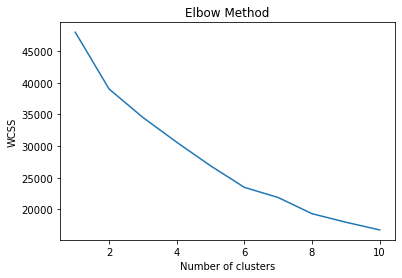

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Airlines_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
clusters_new2 = KMeans(8, random_state=42)
clusters_new2.fit(scaled_Airlines_df)

KMeans(random_state=42)

In [45]:
clusters_new2.labels_

array([2, 2, 2, ..., 0, 1, 1], dtype=int32)

In [46]:
Airlines['clusterid_new2'] = clusters_new2.labels_

In [47]:
clusters_new2.cluster_centers_

array([[ 5.42523583e-01, -8.25708107e-04, -1.27411571e-01,
         8.27599462e-01, -9.82418871e-02, -4.88087556e-02,
         3.94339467e-01,  6.36918869e-01, -1.30441482e-01,
        -1.36221010e-01, -5.22863252e-01,  3.53138563e-01],
       [ 9.66201646e-01, -3.92431882e-01, -1.36020188e-01,
        -7.18544025e-01, -9.82418871e-02, -6.27665798e-02,
        -5.80353570e-01, -6.37653996e-01, -1.89841465e-01,
        -2.09871441e-01, -9.63180105e-01, -4.59000657e-01],
       [-8.32794834e-01, -1.61922373e-01, -1.08219261e-01,
        -5.16159070e-01, -9.82418871e-02, -5.85712306e-02,
        -4.73199608e-01, -3.96844805e-01, -1.50484862e-01,
        -1.61342300e-01,  8.10555946e-01, -2.00449429e-01],
       [ 8.95379222e-02,  4.17981259e-01,  7.08706727e+00,
        -4.32286194e-02, -9.82418871e-02, -6.27665798e-02,
         6.52752308e-02,  7.93259259e-02,  3.52769760e-01,
         3.95268442e-01, -1.15866649e-01,  3.24976816e-01],
       [ 2.19441256e-01, -4.68896637e-02, -1.5623560

In [48]:
Airlines.groupby('clusterid_new2').agg(['mean']).reset_index()

,clusterid_new2,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2625.295640,73518.126703,45.553134,3.198910,1.000000,1.002725,26667.335150,17.717984,277.433243,0.856948,3038.911444,0.540872
1,1,3114.394608,34058.688725,38.893791,1.070261,1.000000,1.000000,3130.498366,5.478758,194.271242,0.577614,2129.711601,0.148693
2,2,1037.611794,57285.533170,60.399672,1.348894,1.000000,1.000819,5718.046683,7.791155,249.371826,0.761671,5792.257166,0.273546
3,3,2102.363636,115718.400000,5626.436364,2.000000,1.000000,1.000000,18721.109091,12.363636,953.945455,2.872727,3879.309091,0.527273
4,4,2252.325581,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,925.064298,161738.539763,83.206430,4.170897,1.000000,1.000000,52727.208122,20.137056,469.060914,1.451777,6045.429780,0.708968
6,6,1759.844828,187511.465517,523.387931,2.198276,1.000000,1.000000,33990.767241,29.448276,6306.215517,18.034483,4606.568966,0.818966
7,7,1650.400000,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [49]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new2
0,0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1,5


In [50]:
Airlines.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new2
3994,3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,3997,54899,0,1,1,1,500,1,500,1,1401,0,1
3998,3998,3016,0,1,1,1,0,0,0,0,1398,0,1


## Hierarchial Clustring

In [51]:
Airlines.drop('clusterid_new2', inplace=True, axis=1)

In [52]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,28143,0,1,1,1,174,1,0,0,7000,0
1,1,19244,0,1,1,1,215,2,0,0,6968,0
2,2,41354,0,1,1,1,4123,4,0,0,7034,0
3,3,14776,0,1,1,1,500,1,0,0,6952,0
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,3997,54899,0,1,1,1,500,1,500,1,1401,0


In [53]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [54]:
df_norm2 = norm_func(Airlines.iloc[:,0:])

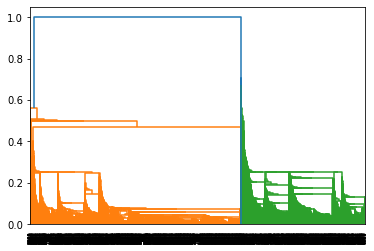

In [55]:
dendrogram = sch.dendrogram(sch.linkage(df_norm2, method='single'))

In [56]:
hc2 = AgglomerativeClustering(n_clusters=8, affinity = 'euclidean', linkage = 'single')

In [57]:
y_hc = hc2.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [58]:
df_norm['h_clusterid'] = hc2.labels_

In [59]:
df_norm['h_clusterid'].head()

0    2
1    7
2    0
3    0
4    0
Name: h_clusterid, dtype: int64

In [60]:
pd.concat([Airlines,df_norm['h_clusterid']],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0,28143,0,1,1,1,174,1,0,0,7000,0,2.0
1,1,19244,0,1,1,1,215,2,0,0,6968,0,7.0
2,2,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,3,14776,0,1,1,1,500,1,0,0,6952,0,0.0
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3994,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
3995,3995,64385,0,1,1,1,981,5,0,0,1395,1,NaN
3996,3996,73597,0,3,1,1,25447,8,0,0,1402,1,NaN
3997,3997,54899,0,1,1,1,500,1,500,1,1401,0,NaN


In [61]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,28143,0,1,1,1,174,1,0,0,7000,0
1,1,19244,0,1,1,1,215,2,0,0,6968,0
2,2,41354,0,1,1,1,4123,4,0,0,7034,0
3,3,14776,0,1,1,1,500,1,0,0,6952,0
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,3997,54899,0,1,1,1,500,1,500,1,1401,0


## DBScan

In [62]:
EW_Airlines=Airlines

In [63]:
array2=EW_Airlines.values[:,0:]

In [64]:
array2

array([[    0, 28143,     0, ...,     0,  7000,     0],
       [    1, 19244,     0, ...,     0,  6968,     0],
       [    2, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 3996, 73597,     0, ...,     0,  1402,     1],
       [ 3997, 54899,     0, ...,     1,  1401,     0],
       [ 3998,  3016,     0, ...,     0,  1398,     0]])

In [65]:
stscaler2 = StandardScaler().fit(array2)
X2 = stscaler2.transform(array2)

In [66]:
X2

array([[-1.73161774e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73075150e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.72988526e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72988526e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.73075150e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.73161774e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [67]:
dbscan = DBSCAN(eps=0.8, min_samples=8)
dbscan.fit(X2)

DBSCAN(eps=0.8, min_samples=8)

In [68]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [69]:
cl=pd.DataFrame(dbscan.labels_,columns=['DBS_cluster'])

In [70]:
cl

,DBS_cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [71]:
pd.concat([EW_Airlines,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBS_cluster
0,0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,3997,54899,0,1,1,1,500,1,500,1,1401,0,0
